In [1]:
import vitaldb
import matplotlib.pyplot as plt

import pandas as pd
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

# only save first third of the cases
df_cases = df_cases.iloc[:len(df_cases)//3]


In [2]:
import os
parameters = [
    'SNUADC/ART', 'SNUADC/CVP', 'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/FEM', 'SNUADC/PLETH',
    'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP', 'Solar8000/BT', 'Solar8000/CVP',
    'Solar8000/ETCO2', 'Solar8000/FEM_DBP', 'Solar8000/FEM_MBP', 'Solar8000/FEM_SBP', 'Solar8000/FEO2',
    'Solar8000/FIO2', 'Solar8000/GAS2_EXPIRED', 'Solar8000/GAS2_INSPIRED', 'Solar8000/HR',
    'Solar8000/INCO2', 'Solar8000/NIBP_DBP', 'Solar8000/NIBP_MBP', 'Solar8000/NIBP_SBP', 'Solar8000/PA_DBP',
    'Solar8000/PA_MBP', 'Solar8000/PA_SBP', 'Solar8000/PLETH_HR', 'Solar8000/PLETH_SPO2', 'Solar8000/RR',
    'Solar8000/RR_CO2', 'Solar8000/ST_AVF', 'Solar8000/ST_AVL', 'Solar8000/ST_AVR', 'Solar8000/ST_I',
    'Solar8000/ST_II', 'Solar8000/ST_III', 'Solar8000/ST_V5', 'Solar8000/VENT_COMPL', 'Solar8000/VENT_INSP_TM',
    'Solar8000/VENT_MAWP', 'Solar8000/VENT_MEAS_PEEP', 'Solar8000/VENT_MV', 'Solar8000/VENT_PIP',
    'Solar8000/VENT_PPLAT', 'Solar8000/VENT_RR', 'Solar8000/VENT_SET_FIO2', 'Solar8000/VENT_SET_PCP',
    'Solar8000/VENT_SET_TV', 'Solar8000/VENT_TV', 'Primus/AWP', 'Primus/CO2', 'Primus/COMPLIANCE',
    'Primus/ETCO2', 'Primus/EXP_DES', 'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
    'Primus/FIO2', 'Primus/FLOW_AIR', 'Primus/FLOW_N2O', 'Primus/FLOW_O2', 'Primus/INCO2', 'Primus/INSP_DES',
    'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV', 'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR',
    'Primus/PIP_MBAR', 'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_FIO2',
    'Primus/SET_FLOW_TRIG', 'Primus/SET_FRESH_FLOW', 'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_PRES',
    'Primus/SET_INSP_TM', 'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV', 'Primus/SET_TV_L',
    'Primus/TV', 'Orchestra/AMD_RATE', 'Orchestra/AMD_VOL', 'Orchestra/DEX2_RATE',
    'Orchestra/DEX2_VOL', 'Orchestra/DEX4_RATE', 'Orchestra/DEX4_VOL', 'Orchestra/DOBU_RATE', 'Orchestra/DOBU_VOL',
    'Orchestra/DOPA_RATE', 'Orchestra/DOPA_VOL', 'Orchestra/DTZ_RATE', 'Orchestra/DTZ_VOL', 'Orchestra/EPI_RATE',
    'Orchestra/EPI_VOL', 'Orchestra/FUT_RATE', 'Orchestra/FUT_VOL', 'Orchestra/MRN_RATE', 'Orchestra/MRN_VOL',
    'Orchestra/NEPI_RATE', 'Orchestra/NEPI_VOL', 'Orchestra/NPS_RATE', 'Orchestra/NPS_VOL', 'Orchestra/NTG_RATE',
    'Orchestra/NTG_VOL', 'Orchestra/OXY_RATE', 'Orchestra/OXY_VOL', 'Orchestra/PGE1_RATE', 'Orchestra/PGE1_VOL',
    'Orchestra/PHEN_RATE', 'Orchestra/PHEN_VOL', 'Orchestra/PPF20_CE', 'Orchestra/PPF20_CP', 'Orchestra/PPF20_CT',
    'Orchestra/PPF20_RATE', 'Orchestra/PPF20_VOL', 'Orchestra/RFTN20_CE', 'Orchestra/RFTN20_CP', 'Orchestra/RFTN20_CT',
    'Orchestra/RFTN20_RATE', 'Orchestra/RFTN20_VOL', 'Orchestra/RFTN50_CE', 'Orchestra/RFTN50_CP', 'Orchestra/RFTN50_CT',
    'Orchestra/RFTN50_RATE', 'Orchestra/RFTN50_VOL', 'Orchestra/ROC_RATE', 'Orchestra/ROC_VOL', 'Orchestra/VASO_RATE',
    'Orchestra/VASO_VOL', 'Orchestra/VEC_RATE', 'Orchestra/VEC_VOL', 'BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV',
    'BIS/EMG', 'BIS/SEF', 'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Invos/SCO2_L', 'Invos/SCO2_R', 'Vigileo/CI', 'Vigileo/CO',
    'Vigileo/SV', 'Vigileo/SVI', 'Vigileo/SVV', 'EV1000/ART_MBP', 'EV1000/CI', 'EV1000/CO', 'EV1000/CVP', 'EV1000/SV',
    'EV1000/SVI', 'EV1000/SVR', 'EV1000/SVRI', 'EV1000/SVV', 'Vigilance/BT_PA', 'Vigilance/CI', 'Vigilance/CO',
    'Vigilance/EDV', 'Vigilance/EDVI', 'Vigilance/ESV', 'Vigilance/ESVI', 'Vigilance/HR_AVG', 'Vigilance/RVEF',
    'Vigilance/SNR', 'Vigilance/SQI', 'Vigilance/SV', 'Vigilance/SVI', 'Vigilance/SVO2', 'CardioQ/ABP', 'CardioQ/FLOW',
    'CardioQ/CI', 'CardioQ/CO', 'CardioQ/FTc', 'CardioQ/FTp', 'CardioQ/HR', 'CardioQ/MA', 'CardioQ/MD', 'CardioQ/PV',
    'CardioQ/SD', 'CardioQ/SV', 'CardioQ/SVI', 'FMS/FLOW_RATE', 'FMS/INPUT_AMB_TEMP', 'FMS/INPUT_TEMP', 'FMS/OUTPUT_AMB_TEMP',
    'FMS/OUTPUT_TEMP', 'FMS/PRESSURE', 'FMS/TOTAL_VOL'
]

# Find caseids with age > 18 and not transplant



valid_caseids = set(df_cases.loc[df_cases['age'] > 18, 'caseid']) & \
                set(df_cases.loc[~df_cases['opname'].str.lower().str.contains("transplant"), 'caseid'])



# Track the best parameters and their caseids
best_parameters = []
best_caseids = valid_caseids

# Iterate to find the best 7 parameters
for _ in range(10):
    best_param = None
    max_caseids = set()

    for param in parameters:
        if param in best_parameters:
            continue

        current_caseids = valid_caseids & set(df_trks.loc[df_trks['tname'] == param, 'caseid'])
        
        if len(current_caseids) > len(max_caseids):
            max_caseids = current_caseids
            best_param = param

    if best_param is not None:
        best_parameters.append(best_param)
        best_caseids = max_caseids
        print(f'Selected parameter: {best_param} with {len(best_caseids)} cases')
    else:
        break  # No more parameters to improve the case count

caseids = list(best_caseids)
print(f'Selected parameters: {best_parameters}')



print(f'{len(caseids)} cases found')


Selected parameter: SNUADC/ECG_II with 224 cases
Selected parameter: Solar8000/HR with 224 cases
Selected parameter: Solar8000/PLETH_HR with 224 cases
Selected parameter: Solar8000/PLETH_SPO2 with 224 cases
Selected parameter: Primus/AWP with 224 cases
Selected parameter: Primus/CO2 with 224 cases
Selected parameter: Primus/ETCO2 with 224 cases
Selected parameter: Primus/FEN2O with 224 cases
Selected parameter: Primus/FEO2 with 224 cases
Selected parameter: Primus/FIN2O with 224 cases
Selected parameters: ['SNUADC/ECG_II', 'Solar8000/HR', 'Solar8000/PLETH_HR', 'Solar8000/PLETH_SPO2', 'Primus/AWP', 'Primus/CO2', 'Primus/ETCO2', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O']
224 cases found


In [3]:
# create new dataframe from best caseids
filtered_cases_df = df_cases.loc[df_cases['caseid'].isin(caseids)]

# sort by caseid
filtered_cases_df = filtered_cases_df.sort_values(by='caseid')
# sort caseids
caseids = list(filtered_cases_df['caseid'])


In [4]:

#case_id = caseids[0]
count = 0
for case_id in caseids:
    count += 1
    try:
        # Fetch data for the current case ID
        vital_data = vitaldb.vital_recs(case_id, best_parameters, 1/10)
        
        # Convert to pandas DataFrame
        df = pd.DataFrame(vital_data)
        
        # Basic data processing
        df.dropna(inplace=True)  # Drop missing values

        # add time
        df['time'] = df.index / 10

        # name columns after the parameter
        df.columns = best_parameters + ['time']

        # calculate the mean, std. deviation and variance for each parameter apart from time and add to the filtered_cases_df for that case id
        for param in best_parameters:
            if param == 'time':
                continue
            filtered_cases_df.loc[filtered_cases_df['caseid'] == case_id, f'{param}_mean'] = df[param].mean()
            filtered_cases_df.loc[filtered_cases_df['caseid'] == case_id, f'{param}_std'] = df[param].std()
            filtered_cases_df.loc[filtered_cases_df['caseid'] == case_id, f'{param}_var'] = df[param].var()
            

        # print filtered df for the case id
        # print(filtered_cases_df.loc[filtered_cases_df['caseid'] == case_id])
    except Exception as e:
        print(f'Failed to fetch/save data for case ID {caseids[0]}: {e}')
    print(f'Processed {count} cases of {len(caseids)}', end='\r')
# save the filtered_cases_df to a csv file
filtered_cases_df.to_csv('filtered_cases.csv', index=False)

In [15]:
#import the filtered_cases_df from the csv file
filtered_cases_df = pd.read_csv('filtered_cases.csv')

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it includes the target variables 'death_inhosp' and 'los_postop'

# Select feature columns
feature_columns = [
    'SNUADC/ECG_II_mean', 'SNUADC/ECG_II_std', 'SNUADC/ECG_II_var',
    'Solar8000/HR_mean', 'Solar8000/HR_std', 'Solar8000/HR_var',
    'Solar8000/PLETH_HR_mean', 'Solar8000/PLETH_HR_std', 'Solar8000/PLETH_HR_var',
    'Solar8000/PLETH_SPO2_mean', 'Solar8000/PLETH_SPO2_std', 'Solar8000/PLETH_SPO2_var',
    'Primus/AWP_mean', 'Primus/AWP_std', 'Primus/AWP_var',
    'Primus/CO2_mean', 'Primus/CO2_std', 'Primus/CO2_var',
    'Primus/ETCO2_mean', 'Primus/ETCO2_std', 'Primus/ETCO2_var',
    'Primus/FEN2O_mean', 'Primus/FEN2O_std', 'Primus/FEN2O_var',
    'Primus/FEO2_mean', 'Primus/FEO2_std', 'Primus/FEO2_var',
    'Primus/FIN2O_mean', 'Primus/FIN2O_std', 'Primus/FIN2O_var',
    # Intraoperative parameters
     'intraop_rbc', 'intraop_ffp', 'intraop_colloid',
    'intraop_ppf', 'intraop_mdz', 'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph',
    'intraop_phe', 'intraop_epi', 'intraop_ca',
    # Preoperative parameters
    #'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun',
 
]

df = filtered_cases_df.copy()

# Split the data
X = df[feature_columns]
y_death = df['death_inhosp']
y_los = df['icu_days']

# check if X has nan values and which column
print(X.isnull().sum())

SNUADC/ECG_II_mean           0
SNUADC/ECG_II_std            0
SNUADC/ECG_II_var            0
Solar8000/HR_mean            0
Solar8000/HR_std             0
Solar8000/HR_var             0
Solar8000/PLETH_HR_mean      0
Solar8000/PLETH_HR_std       0
Solar8000/PLETH_HR_var       0
Solar8000/PLETH_SPO2_mean    0
Solar8000/PLETH_SPO2_std     0
Solar8000/PLETH_SPO2_var     0
Primus/AWP_mean              0
Primus/AWP_std               0
Primus/AWP_var               0
Primus/CO2_mean              0
Primus/CO2_std               0
Primus/CO2_var               0
Primus/ETCO2_mean            0
Primus/ETCO2_std             0
Primus/ETCO2_var             0
Primus/FEN2O_mean            0
Primus/FEN2O_std             0
Primus/FEN2O_var             0
Primus/FEO2_mean             0
Primus/FEO2_std              0
Primus/FEO2_var              0
Primus/FIN2O_mean            0
Primus/FIN2O_std             0
Primus/FIN2O_var             0
intraop_rbc                  0
intraop_ffp                  0
intraop_

In [32]:



X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X, y_death, test_size=0.2, random_state=42)
X_train_los, X_test_los, y_train_los, y_test_los = train_test_split(X, y_los, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_death = scaler.fit_transform(X_train_death)
X_test_death = scaler.transform(X_test_death)
X_train_los = scaler.fit_transform(X_train_los)
X_test_los = scaler.transform(X_test_los)

# Train a logistic regression model for mortality prediction
log_reg = LogisticRegression()
log_reg.fit(X_train_death, y_train_death)
y_pred_death = log_reg.predict(X_test_death)

# Train a random forest regressor for length of stay prediction
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_los, y_train_los)
y_pred_los = rf_reg.predict(X_test_los)

# Evaluate the models
accuracy = accuracy_score(y_test_death, y_pred_death)
mse = mean_squared_error(y_test_los, y_pred_los)


Mortality Prediction Accuracy: 1.0
Length of Stay Prediction MSE: 46.575515555555555


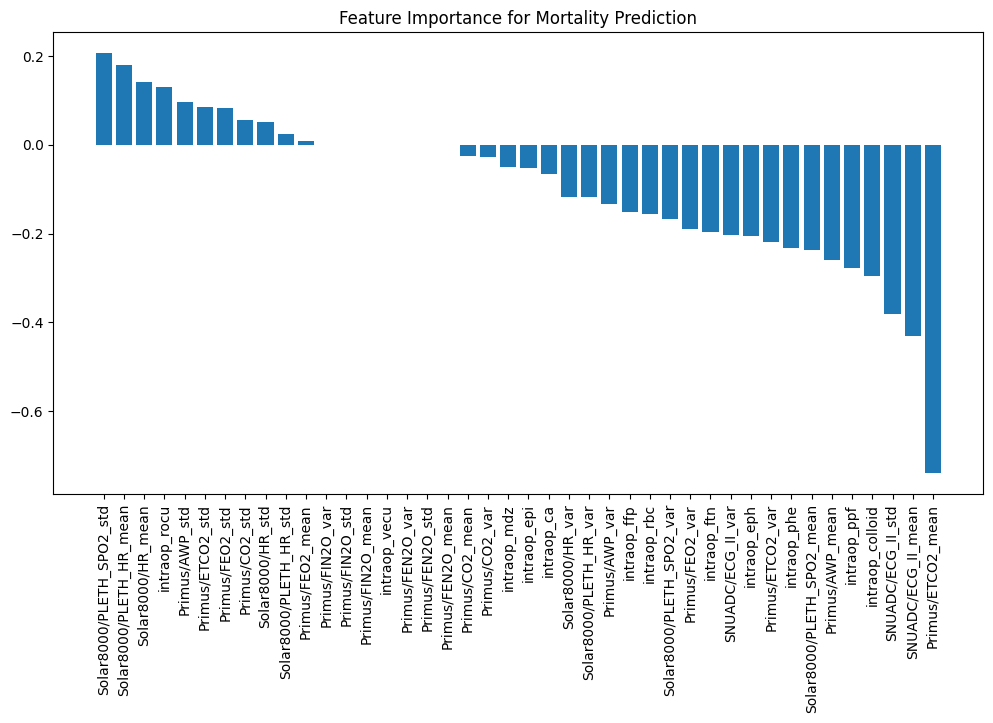

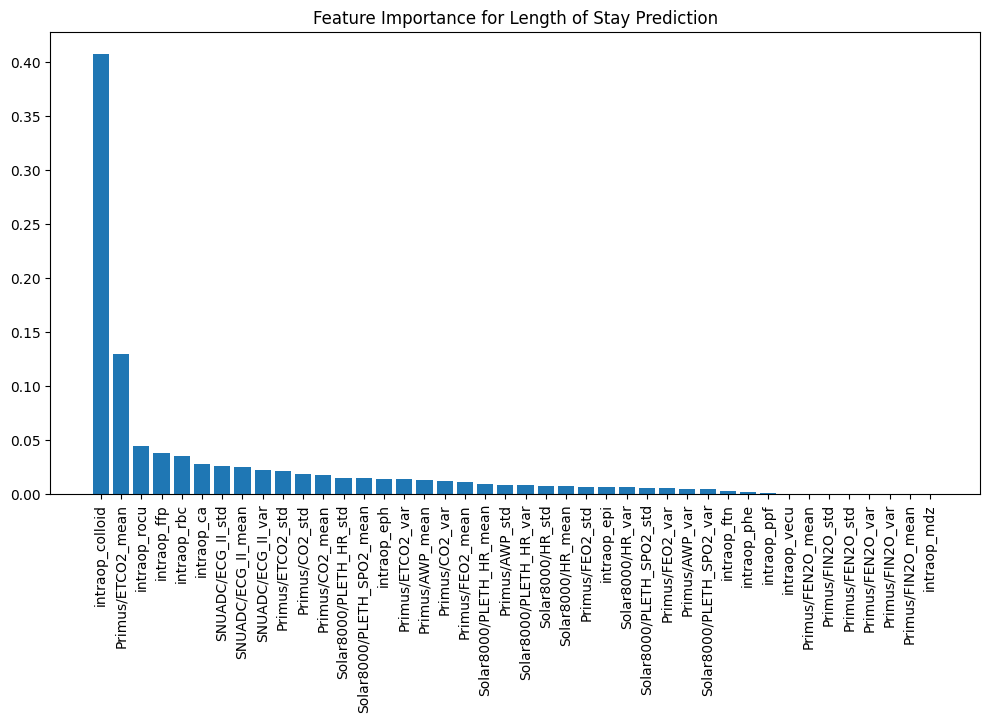

In [33]:

print(f'Mortality Prediction Accuracy: {accuracy}')
print(f'Length of Stay Prediction MSE: {mse}')

# Feature importance for mortality prediction
importance_death = log_reg.coef_[0]
indices_death = np.argsort(importance_death)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance for Mortality Prediction")
plt.bar(range(X.shape[1]), importance_death[indices_death], align="center")
plt.xticks(range(X.shape[1]), [feature_columns[i] for i in indices_death], rotation=90)
plt.show()

# Feature importance for length of stay prediction
importance_los = rf_reg.feature_importances_
indices_los = np.argsort(importance_los)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance for Length of Stay Prediction")
plt.bar(range(X.shape[1]), importance_los[indices_los], align="center")
plt.xticks(range(X.shape[1]), [feature_columns[i] for i in indices_los], rotation=90)
plt.show()

In [8]:
import requests
import pandas as pd
from io import StringIO
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def getVitaDBData():
    # URL of the CSV file
    url = 'https://api.vitaldb.net/cases'

    # Send a GET request to fetch the CSV file
    response = requests.get(url)

    # Ensure the request was successful
    if response.status_code == 200:
        # Convert the response content to a pandas DataFrame
        df = pd.read_csv(StringIO(response.text))
        print("DataFrame loaded successfully:")
        print(df.head())  # Display the first few rows of the DataFrame
        print(df.columns)

        # Preprocessing:
        # Convert all string entries to lowercase
        df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
        # Remove leading and trailing spaces from all string entries
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

        return df

    else:
        print(f"Failed to fetch the CSV file. Status code: {response.status_code}")

        return None


def occurenceCounter(data, col):
    # Count the occurrences of each unique value in the "dx" column
    value_counts = data[col].value_counts()
    # Convert the result to a dictionary
    value_counts_dict = value_counts.to_dict()
    print(f"Value counts for column {col}:")
    print(value_counts_dict)

    return value_counts_dict

def sortBy(data, col):
    # Sort the DataFrame by the col column in descending order
    df_sorted = data.sort_values(by=col, ascending=False)
    
    print("\nDataFrame sorted by column 'xy' in descending order:")
    print(df_sorted[['optype', 'dx', 'opname', 'approach', col]])

    return df_sorted

#
#   Implementation of the different models
#
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}

from sklearn.linear_model import Ridge

def train_ridge_regression(X_train, X_test, y_train, y_test):
    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}

from sklearn.linear_model import Lasso

def train_lasso_regression(X_train, X_test, y_train, y_test):
    model = Lasso()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}

from sklearn.linear_model import ElasticNet

def train_elasticnet_regression(X_train, X_test, y_train, y_test):
    model = ElasticNet()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}

from sklearn.tree import DecisionTreeRegressor

def train_decision_tree_regression(X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}

from sklearn.ensemble import RandomForestRegressor

def train_random_forest_regression(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}

from xgboost import XGBRegressor

def train_gradient_boosting_regression(X_train, X_test, y_train, y_test):
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}

from sklearn.svm import SVR

def train_support_vector_regression(X_train, X_test, y_train, y_test):
    model = SVR()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model, 'mse': mse, 'r2': r2}


df = getVitaDBData()


# Convert 'sex' column to numeric values: 'm' -> 1, 'f' -> 0
df['sex'] = df['sex'].map({'m': 1, 'f': 0})

# Remove rows with missing values in any of the selected columns
columns_to_check = ['age', 'sex', 'height', 'weight', 'bmi', 'asa', 'emop']
df_clean = df.dropna(subset=columns_to_check)

# Print the number of rows and columns in the cleaned dataset
print(f"Number of rows in the cleaned dataset: {df_clean.shape[0]}")
print(f"Number of columns in the cleaned dataset: {df_clean.shape[1]}")

# Save the cleaned dataframe to an Excel file
df_clean.to_excel("cleaned_data.xlsx", index=False)

# Define features and target
X = df_clean[['age', 'sex', 'height', 'weight', 'bmi', 'asa', 'emop']]
y = df_clean['icu_days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models_to_train = [
    train_linear_regression,
    train_ridge_regression,
    train_lasso_regression,
    train_elasticnet_regression,
    train_decision_tree_regression,
    train_random_forest_regression,
    train_gradient_boosting_regression,
    train_support_vector_regression
]

results = {}

for model_fn in models_to_train:
    model_name = model_fn.__name__[6:]  # Get model name without 'train_'
    print(f"Training {model_name}...")
    model_results = model_fn(X_train, X_test, y_train, y_test)
    results[model_name] = model_results

# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {result['mse']}")
    print(f"R-squared: {result['r2']}")
    print("\n")

DataFrame loaded successfully:
   caseid  subjectid  casestart  caseend  anestart   aneend  opstart  opend  \
0       1       5955          0    11542      -552  10848.0     1668  10368   
1       2       2487          0    15741     -1039  14921.0     1721  14621   
2       3       2861          0     4394      -590   4210.0     1090   3010   
3       4       1903          0    20990      -778  20222.0     2522  17822   
4       5       4416          0    21531     -1009  22391.0     2591  20291   

      adm      dis  ...  intraop_colloid  intraop_ppf  intraop_mdz  \
0 -236220   627780  ...                0          120          0.0   
1 -221160  1506840  ...                0          150          0.0   
2 -218640    40560  ...                0            0          0.0   
3 -201120   576480  ...                0           80          0.0   
4  -67560  3734040  ...                0            0          0.0   

  intraop_ftn  intraop_rocu  intraop_vecu  intraop_eph  intraop_phe  \
0 

/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_38904/231035796.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/4x/bz2824s146n10c63_0mz1y840000gn/T/ipykernel_38904/231035796.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Training linear_regression...
Training ridge_regression...
Training lasso_regression...
Training elasticnet_regression...
Training decision_tree_regression...
Training random_forest_regression...
Training gradient_boosting_regression...
Training support_vector_regression...
Model: linear_regression
MSE: 4.084331415078069
R-squared: 0.235880213030215


Model: ridge_regression
MSE: 4.084136675056253
R-squared: 0.23591664609327045


Model: lasso_regression
MSE: 5.161770784810315
R-squared: 0.03430677101389745


Model: elasticnet_regression
MSE: 5.145984103024755
R-squared: 0.03726023259598399


Model: decision_tree_regression
MSE: 3.768185451638689
R-squared: 0.29502658527191006


Model: random_forest_regression
MSE: 3.53314964028777
R-squared: 0.3389984121997458


Model: gradient_boosting_regression
MSE: 4.2702409229580764
R-squared: 0.2010992169380188


Model: support_vector_regression
MSE: 5.331939337556647
R-squared: 0.002470677156906187


